# Prediction of $CO_2$ Emission in the automobile using its features by Scikit-learn and Pandas

## Linear Regression

Linear Regression is the process of fiting a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ where the 'residual sum of squares' between the independent x and the dependent y in the dataset is minimized by the linear approximation. <br> <br>
In simple terms, it is the prediction of a dependent variable value (Y) based on a given independent variable (X) <br>

So, when X and Y are plotted in a graph, then linear regression deduces a straight line that best fits the data points. <br>
The equation of straight line is given as, <br>
$y=mx+c$ <br> <br>
I implemented using simple linear regression followed by multiple linear regression

## Simple Linear Regression

Simple Linear Regression is only when the dependant variable (Y) can be predicted from only one independant variable (X) <br>

In this, we are going to predict the **CO2EMISSIONS** from **ENGINESIZE** from the dataset


In [8]:
# Load all necessary header files or libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import seaborn as sea
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
#Loading the dataset called FuelConsumption.csv
dataset=pd.read_csv('//.......//FuelConsumption.csv')

#Visualizing the first 10 rows of the dataset
dataset.head(10) 

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [10]:
#Visualizing the statistical details of the dataset
dataset.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


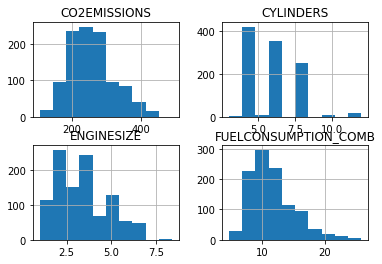

In [11]:
#Sorting the features and plotting it as histogram
sorteddata = dataset[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS','CO2EMISSIONS']]
sorteddata.hist()
plt.show()

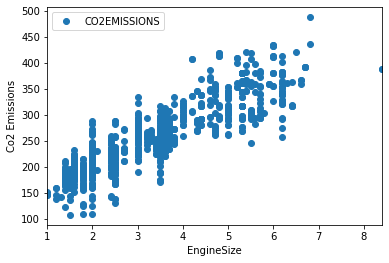

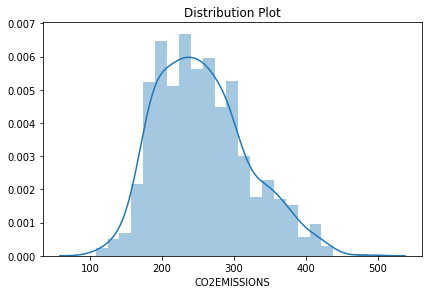

In [12]:
dataset.plot(x='ENGINESIZE',y='CO2EMISSIONS',style='o')
plt.xlabel("EngineSize")
plt.ylabel("Co2 Emissions")
plt.show()

#Plotting the distribution plot using Seaborn
plt.title("Distribution Plot")
plt.tight_layout()
sea.distplot(dataset['CO2EMISSIONS'])

In [13]:
#Splitting the dataset into training and test sets manually without using train_test_split().
#Dataset is split as 80% of the entire data for training and the 20% for testing.
randd=np.random.rand(len(dataset))<0.8
train_data=dataset[randd]
test_data=dataset[~randd]

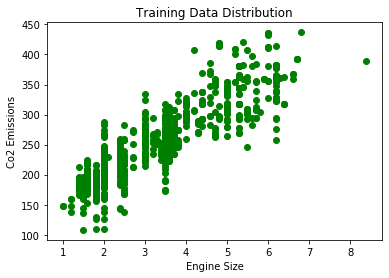

In [14]:
plt.scatter(train_data.ENGINESIZE,train_data.CO2EMISSIONS,color='green')
plt.title("Training Data Distribution")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

In [15]:
#Training model is built

#Creating object for linear regression model
regression=linear_model.LinearRegression()

#Training data
x_train=np.asanyarray(train_data[['ENGINESIZE']])
y_train=np.asanyarray(train_data[['CO2EMISSIONS']])
#testing data
x_test=np.asanyarray(test_data[['ENGINESIZE']])
y_test=np.asanyarray(test_data[['CO2EMISSIONS']])
regression.fit(x_train,y_train)

#The parameters of the line are determined and printed
print("Coefficient:",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient: [[38.81248796]]
Intercept:  [125.98766547]


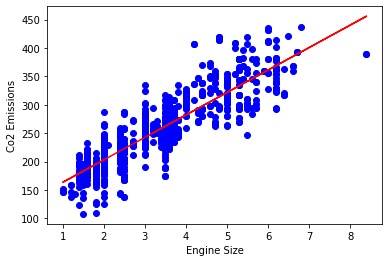

In [90]:
#Computing y by substituting the parameters of the equation
y=regression.coef_[0][0]*x_train+regression.intercept_[0]

#Plotting the best fit line over the data points
plt.scatter(train_data.ENGINESIZE,train_data.CO2EMISSIONS,color='blue')
plt.plot(x_train,y,color='red')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

In [16]:
#Predicting Y [Emissions] from test data X
test_y_predict=regression.predict(x_test)

#Comparing the actual and predicted values as dataframes using Pandas
compare=pd.DataFrame({'Actual Value': y_test.flatten(),'Predicted Value':test_y_predict.flatten()})
compare

,Actual Value,Predicted Value
0,221,219.137637
1,267,269.593871
2,212,219.137637
3,225,219.137637
4,239,261.831373
...,...,...
214,194,203.612641
215,124,180.325149
216,248,265.712622
217,281,242.425129


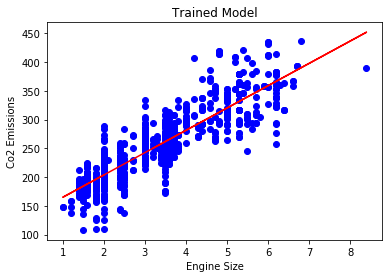

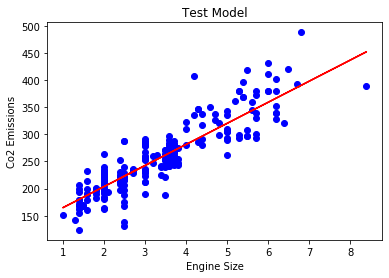

In [17]:
#Plotting Trained model and Test model
plt.scatter(train_data.ENGINESIZE,train_data.CO2EMISSIONS,color='blue')
plt.plot(x_train,regression.coef_[0][0]*x_train+regression.intercept_[0],color='red')
plt.title("Trained Model")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,test_y_predict,color='red')
plt.title("Test Model")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.show()

#### Model Evaluation

As the regression model is developed, the actual values and predicted values can be compared to calculate the accuracy of the model as <br>
<ul>
    <li> Mean Absolute Error [MAE] </li>
    <li> Mean Squared Error [MSE </li>
    <li> Root Mean Squared Error [RMSE]</li>
    <li> R Score </li>
</ul>

In [18]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,test_y_predict))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,test_y_predict))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,test_y_predict)))
print('R2 Score:',metrics.r2_score(y_test,test_y_predict))

Mean Absolute Error: 22.625513404854733
Mean Squared Error: 908.6739088040896
Root Mean Squared Error: 30.14421849715281
R2 Score: 0.7885232838568713


### Multiple Linear Regression


Muliplt Linear Regression can be done when the dependant variable $(Y)$ can be predicted from many independant variables $(X1,X2,.....)$ <br>

In this, we are going to predict the **CO2EMISSIONS** from **ENGINESIZE, FUELCONSUMPTION_COMB, CYLINDERS** from the dataset.

The same above steps can be done for this type as well.

In [19]:
#Sorting the features from dataset
multiple_data=dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
multiple_data.head(10)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


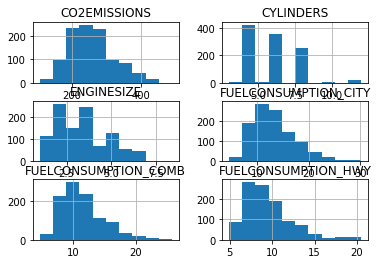

In [20]:
#plotting it as histogram
multiple_data.hist()
plt.show()

In [21]:
#Splitting up of the datataset is done using train_test_split() instead of doing it manually.
#Dataset is split as 80% of the entire data for training and the 20% for testing.
X=dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']].values
Y=dataset[['CO2EMISSIONS']].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#Creating Regression model
regression.fit(x_train,y_train)
print("Coefficient:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient: [[11.98993058  7.54469599  8.98695981]]
Intercept: [69.05220993]


In [22]:
#Predicting Y [Emissions] from test data X
y_predict=regression.predict(x_test)

#Comparing the actual and predicted values as dataframes using Pandas
dataframe=pd.DataFrame({'Actual Value': y_test.flatten(), 'Predicted Value': y_predict.flatten()})
dataframe.head(25)

,Actual Value,Predicted Value
0,356,334.652273
1,209,209.788162
2,230,217.876425
3,212,229.373229
4,168,194.810627
5,292,296.299862
6,212,210.686858
7,276,265.327654
8,202,207.092074
9,334,319.670348


In [23]:
#Model Evaluation is performed
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_predict))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('Variance:',regression.score(x_test,y_test))
print('R2 Score:',metrics.r2_score(y_test,y_predict))

Mean Absolute Error: 18.016270102501494
Mean Squared Error: 589.2351940837917
Root Mean Squared Error: 24.274167217101223
Variance: 0.8604199405627125
R2 Score: 0.8604199405627125


Reference: <br> 
https://www.coursera.org/